In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fich = pd.read_csv("x_train.csv",";")
res = pd.read_csv("y_train.csv",";",header=None)
res = res.rename_axis({0: "res"}, axis="columns")
test = pd.read_csv("x_test.csv",";")

In [31]:
pd.concat([fich.maxPlayerLevel, res] , axis = 1).sort()

/home/kirill/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,maxPlayerLevel,res
0,39,0
1,21,1
2,5,1
3,21,1
4,4,0
5,0,0
6,13,1
7,13,1
8,2,0
9,1,0


In [4]:
res.head(5)

,res
0,0
1,1
2,1
3,1
4,0


In [5]:
test.head(5)

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
0,13,7,2,9,18.000000,0,2,1.0,1565000,1125,16,1
1,3,4,1,4,8.000000,0,0,0.0,602000,900,9,1
2,42,8,3,24,24.714286,0,5,0.4,2196000,1375,17,4
3,39,5,4,13,26.250000,0,0,0.0,1353000,650,8,4
4,6,7,1,7,11.285714,0,2,1.0,1352000,1375,16,1


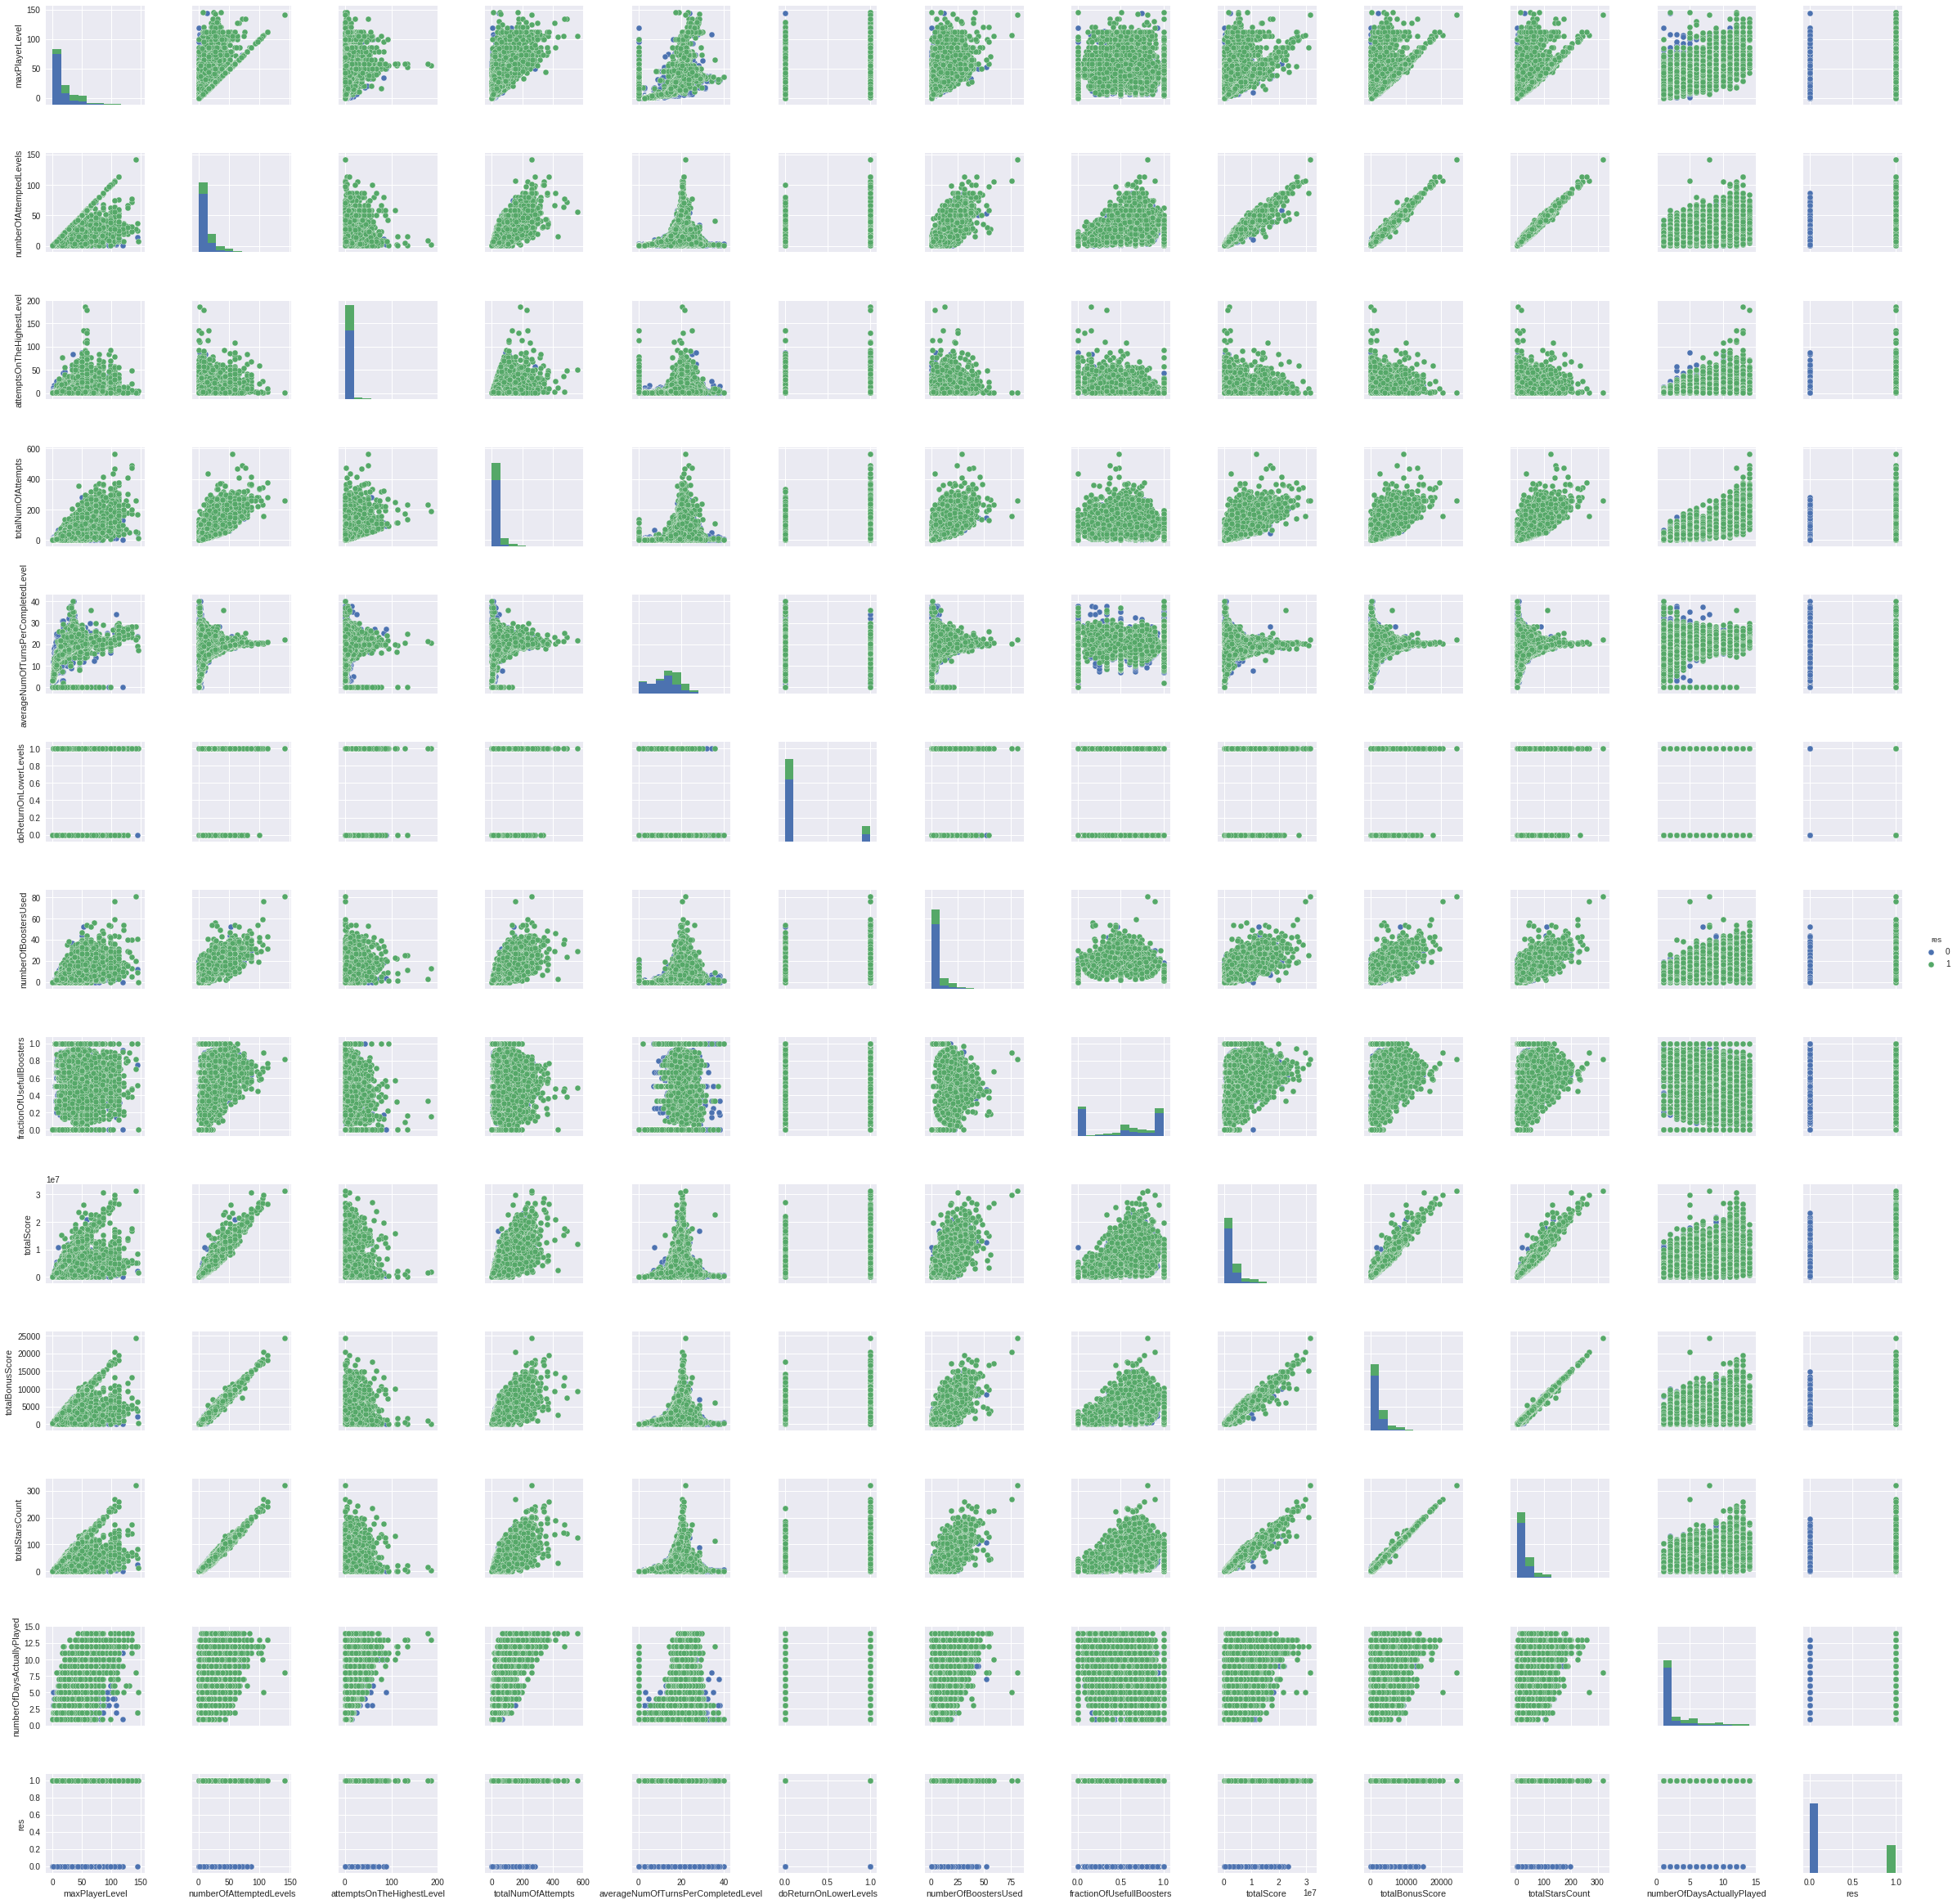

In [156]:
import seaborn as sns
sns.pairplot(pd.concat([fich, res] , axis = 1) , hue="res")

In [3]:
fich.columns

Index([u'maxPlayerLevel', u'numberOfAttemptedLevels',
       u'attemptsOnTheHighestLevel', u'totalNumOfAttempts',
       u'averageNumOfTurnsPerCompletedLevel', u'doReturnOnLowerLevels',
       u'numberOfBoostersUsed', u'fractionOfUsefullBoosters', u'totalScore',
       u'totalBonusScore', u'totalStarsCount', u'numberOfDaysActuallyPlayed'],
      dtype='object')

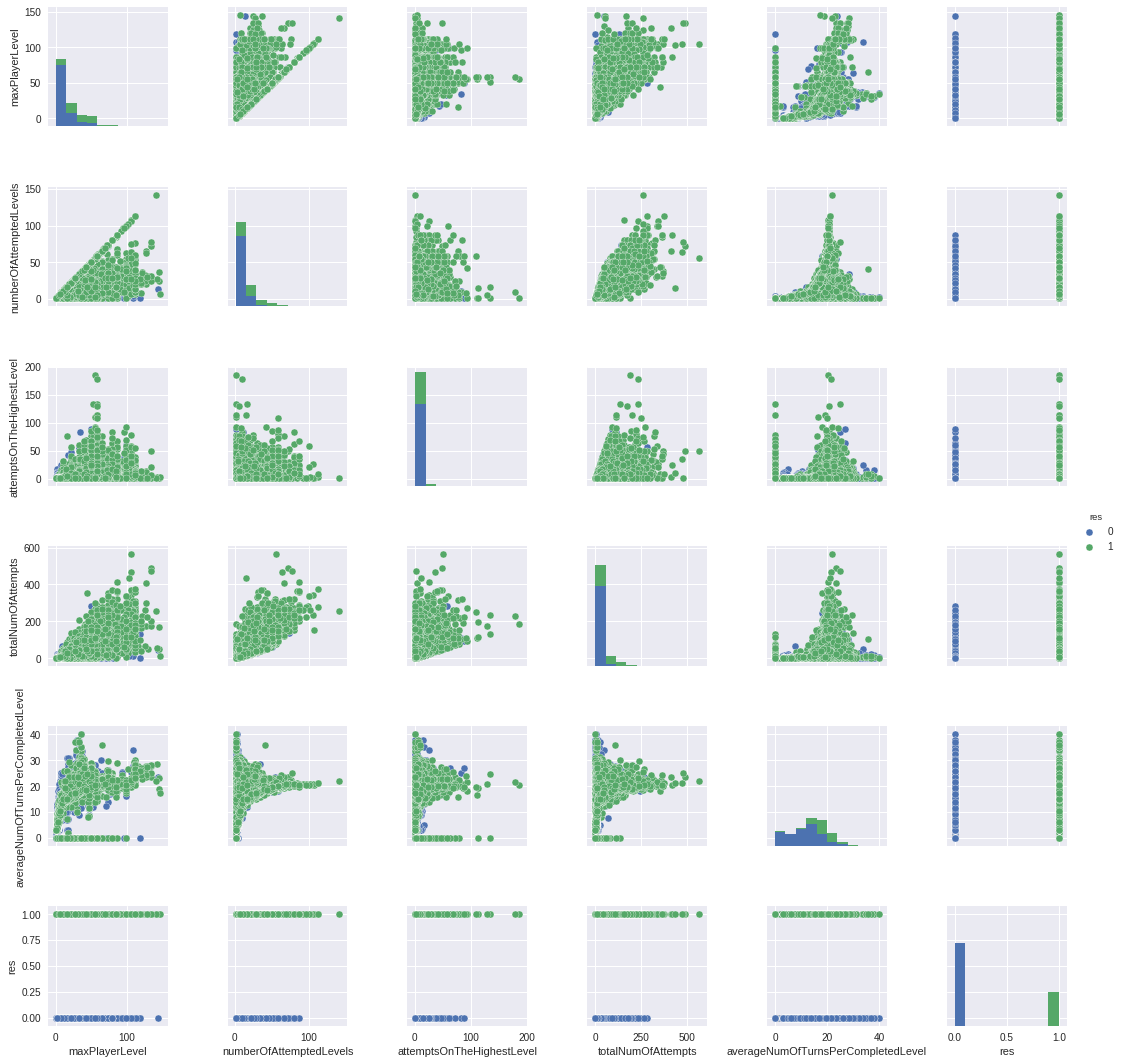

In [6]:
sns.pairplot(pd.concat([fich, res] , axis = 1) , hue="res", vars=[u'maxPlayerLevel', u'numberOfAttemptedLevels',
       u'attemptsOnTheHighestLevel', u'totalNumOfAttempts',
       u'averageNumOfTurnsPerCompletedLevel' , 'res'])

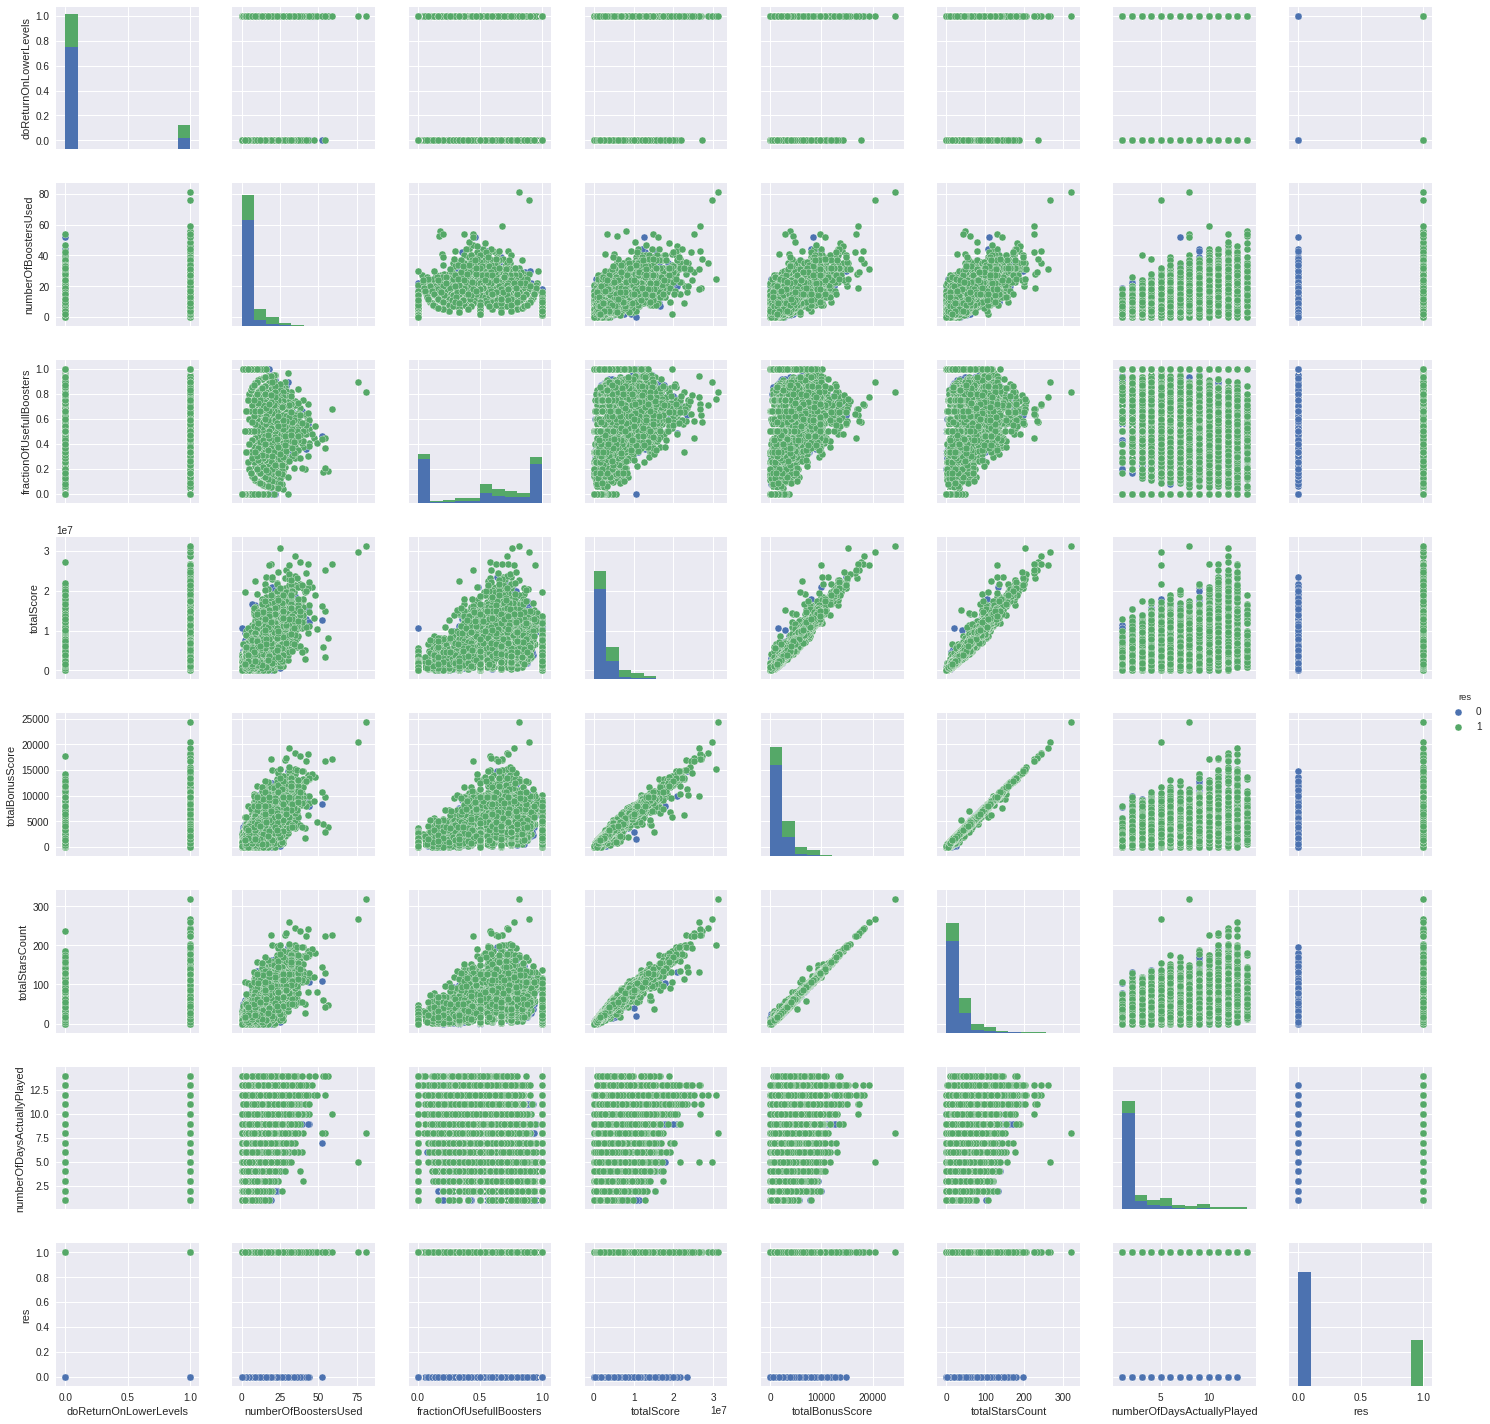

In [7]:
sns.pairplot(pd.concat([fich, res] , axis = 1) , hue="res", vars=[u'doReturnOnLowerLevels',
       u'numberOfBoostersUsed', u'fractionOfUsefullBoosters', u'totalScore',
       u'totalBonusScore', u'totalStarsCount', u'numberOfDaysActuallyPlayed' , 'res'])

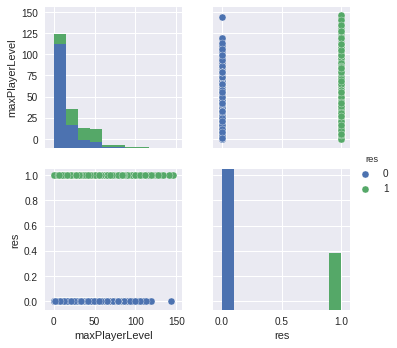

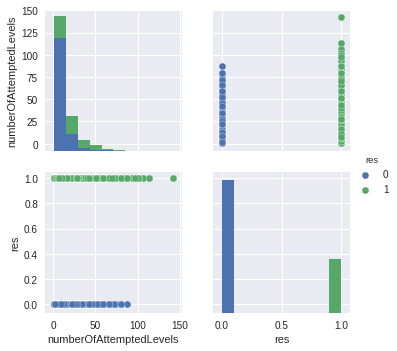

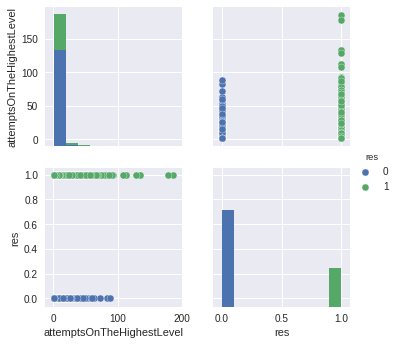

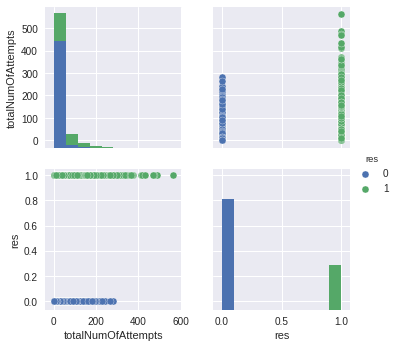

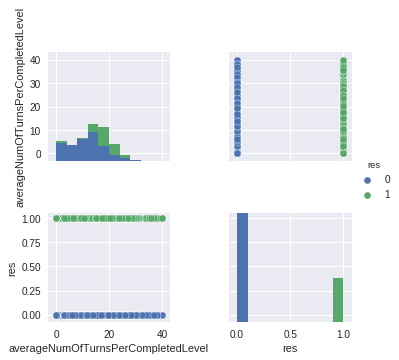

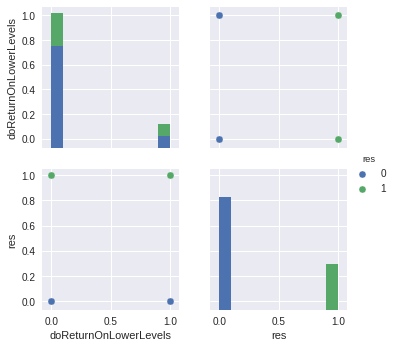

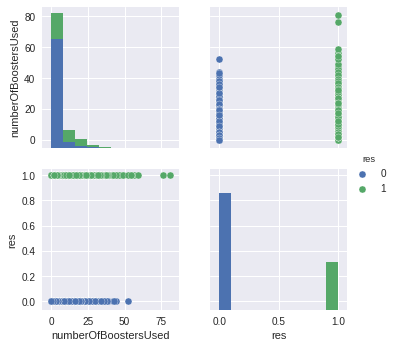

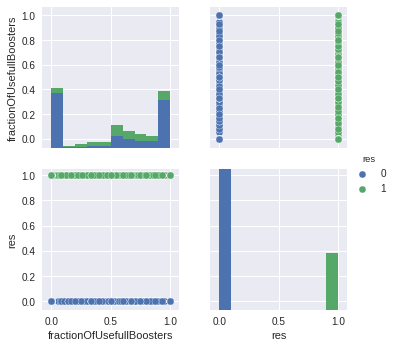

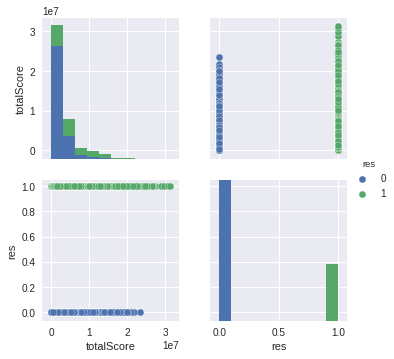

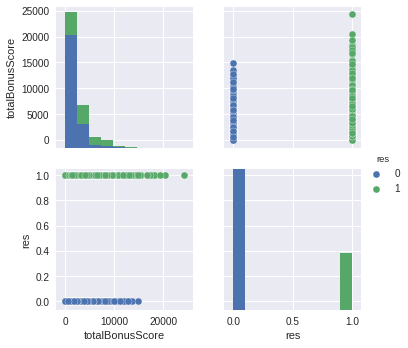

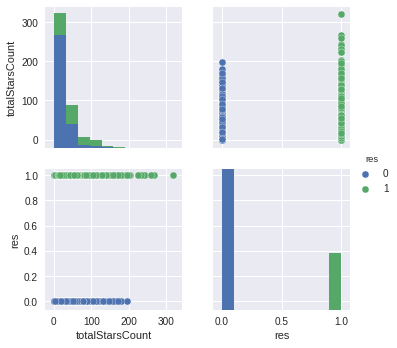

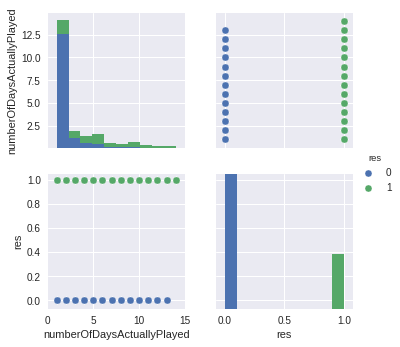

In [6]:
for col in fich.columns:
    sns.pairplot(pd.concat([fich[col], res] , axis = 1) , hue="res")

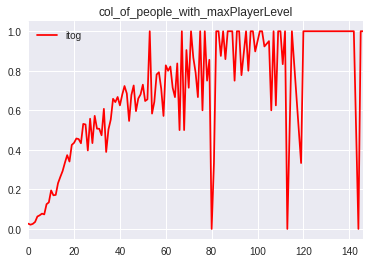

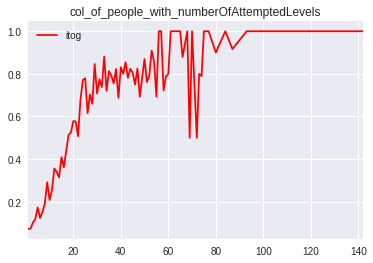

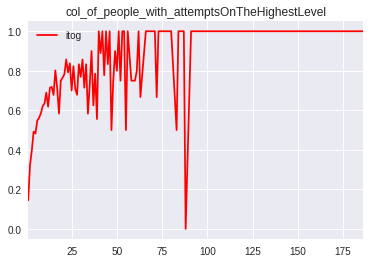

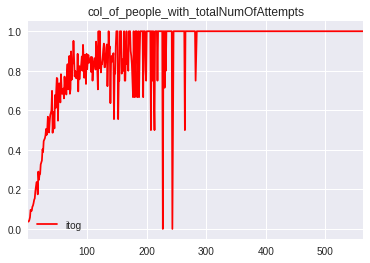

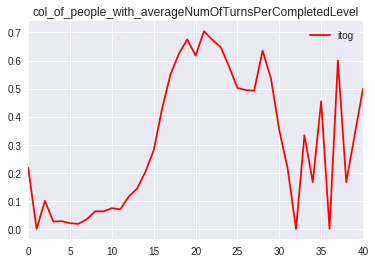

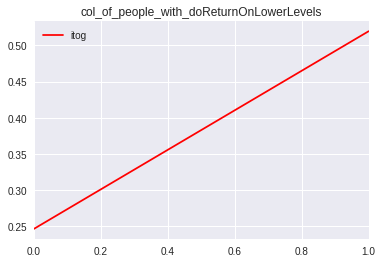

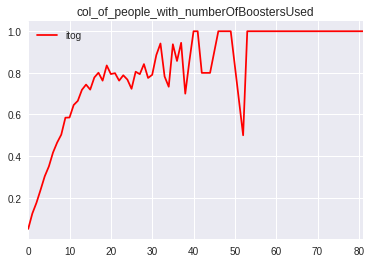

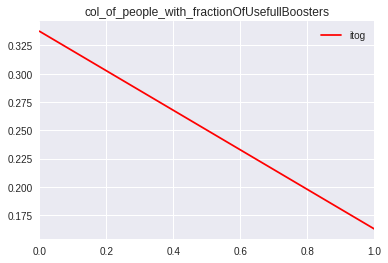

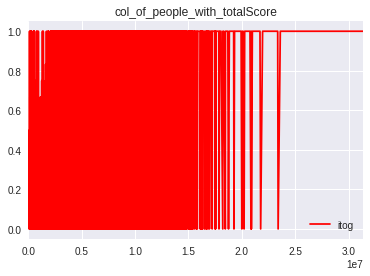

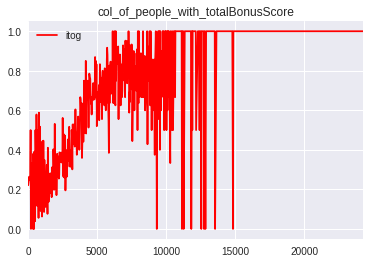

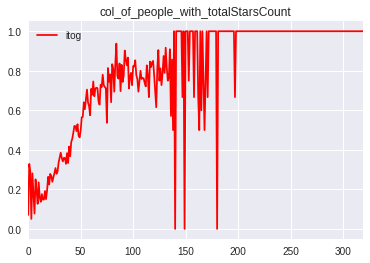

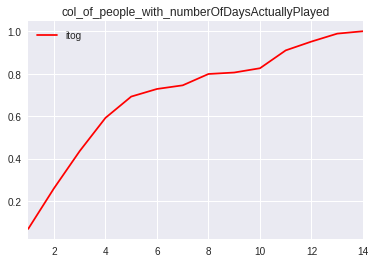

In [96]:
for col in fich.columns:
    x = np.zeros(int(fich[col].max()) + 1)
    for p in fich[col]:
        x[int(p)] += 1
    x = pd.DataFrame(x)
    x = x.rename(columns={0:'col_of_people_with_' + col})

    r = np.zeros(int(fich[col].max()) + 1)
    for p in pd.concat([fich[col], res] , axis = 1).values:
        r[int(p[0])] += p[1]

    r = pd.DataFrame(r)
    r = r.rename(columns={0:'res'})

    l = pd.concat([r, x] , axis = 1)
    l = l[l['col_of_people_with_' + col]>0]
    l['itog'] = l.res/l['col_of_people_with_' + col]
    l.plot(y='itog' ,kind='line', color='red' , title='col_of_people_with_' + col)

In [3]:
fich = pd.concat([fich, test], axis=0 ,ignore_index=True) # 25289

In [4]:
fich.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1


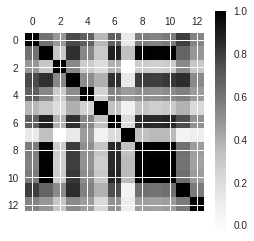

In [158]:
plt.matshow(pd.concat([fich, res] , axis = 1).corr())
plt.colorbar()

In [159]:
pd.concat([fich, res] , axis = 1).corr()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,res
maxPlayerLevel,1.000000,0.616157,0.472142,0.757854,0.683706,0.368297,0.675955,0.126235,0.570234,0.551366,0.579593,0.793385,0.542139
numberOfAttemptedLevels,0.616157,1.000000,0.300797,0.836398,0.531197,0.290636,0.881915,0.332887,0.979954,0.989014,0.993779,0.663450,0.477400
attemptsOnTheHighestLevel,0.472142,0.300797,1.000000,0.532032,0.277072,0.197035,0.389465,-0.041700,0.277326,0.264804,0.281343,0.524109,0.302189
totalNumOfAttempts,0.757854,0.836398,0.532032,1.000000,0.509510,0.391969,0.836706,0.128843,0.798051,0.795570,0.808989,0.846448,0.520739
averageNumOfTurnsPerCompletedLevel,0.683706,0.531197,0.277072,0.509510,1.000000,0.250261,0.543847,0.457168,0.499681,0.489411,0.514770,0.555594,0.456771
doReturnOnLowerLevels,0.368297,0.290636,0.197035,0.391969,0.250261,1.000000,0.320439,0.071646,0.310218,0.271397,0.288803,0.383024,0.216669
numberOfBoostersUsed,0.675955,0.881915,0.389465,0.836706,0.543847,0.320439,1.000000,0.203519,0.854263,0.851824,0.862254,0.751712,0.493276
fractionOfUsefullBoosters,0.126235,0.332887,-0.041700,0.128843,0.457168,0.071646,0.203519,1.000000,0.328287,0.358474,0.358219,0.058929,0.103720
totalScore,0.570234,0.979954,0.277326,0.798051,0.499681,0.310218,0.854263,0.328287,1.000000,0.985111,0.986423,0.617847,0.451414
totalBonusScore,0.551366,0.989014,0.264804,0.795570,0.489411,0.271397,0.851824,0.358474,0.985111,1.000000,0.997357,0.606864,0.439642


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9383e4fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa936507690>]], dtype=object)

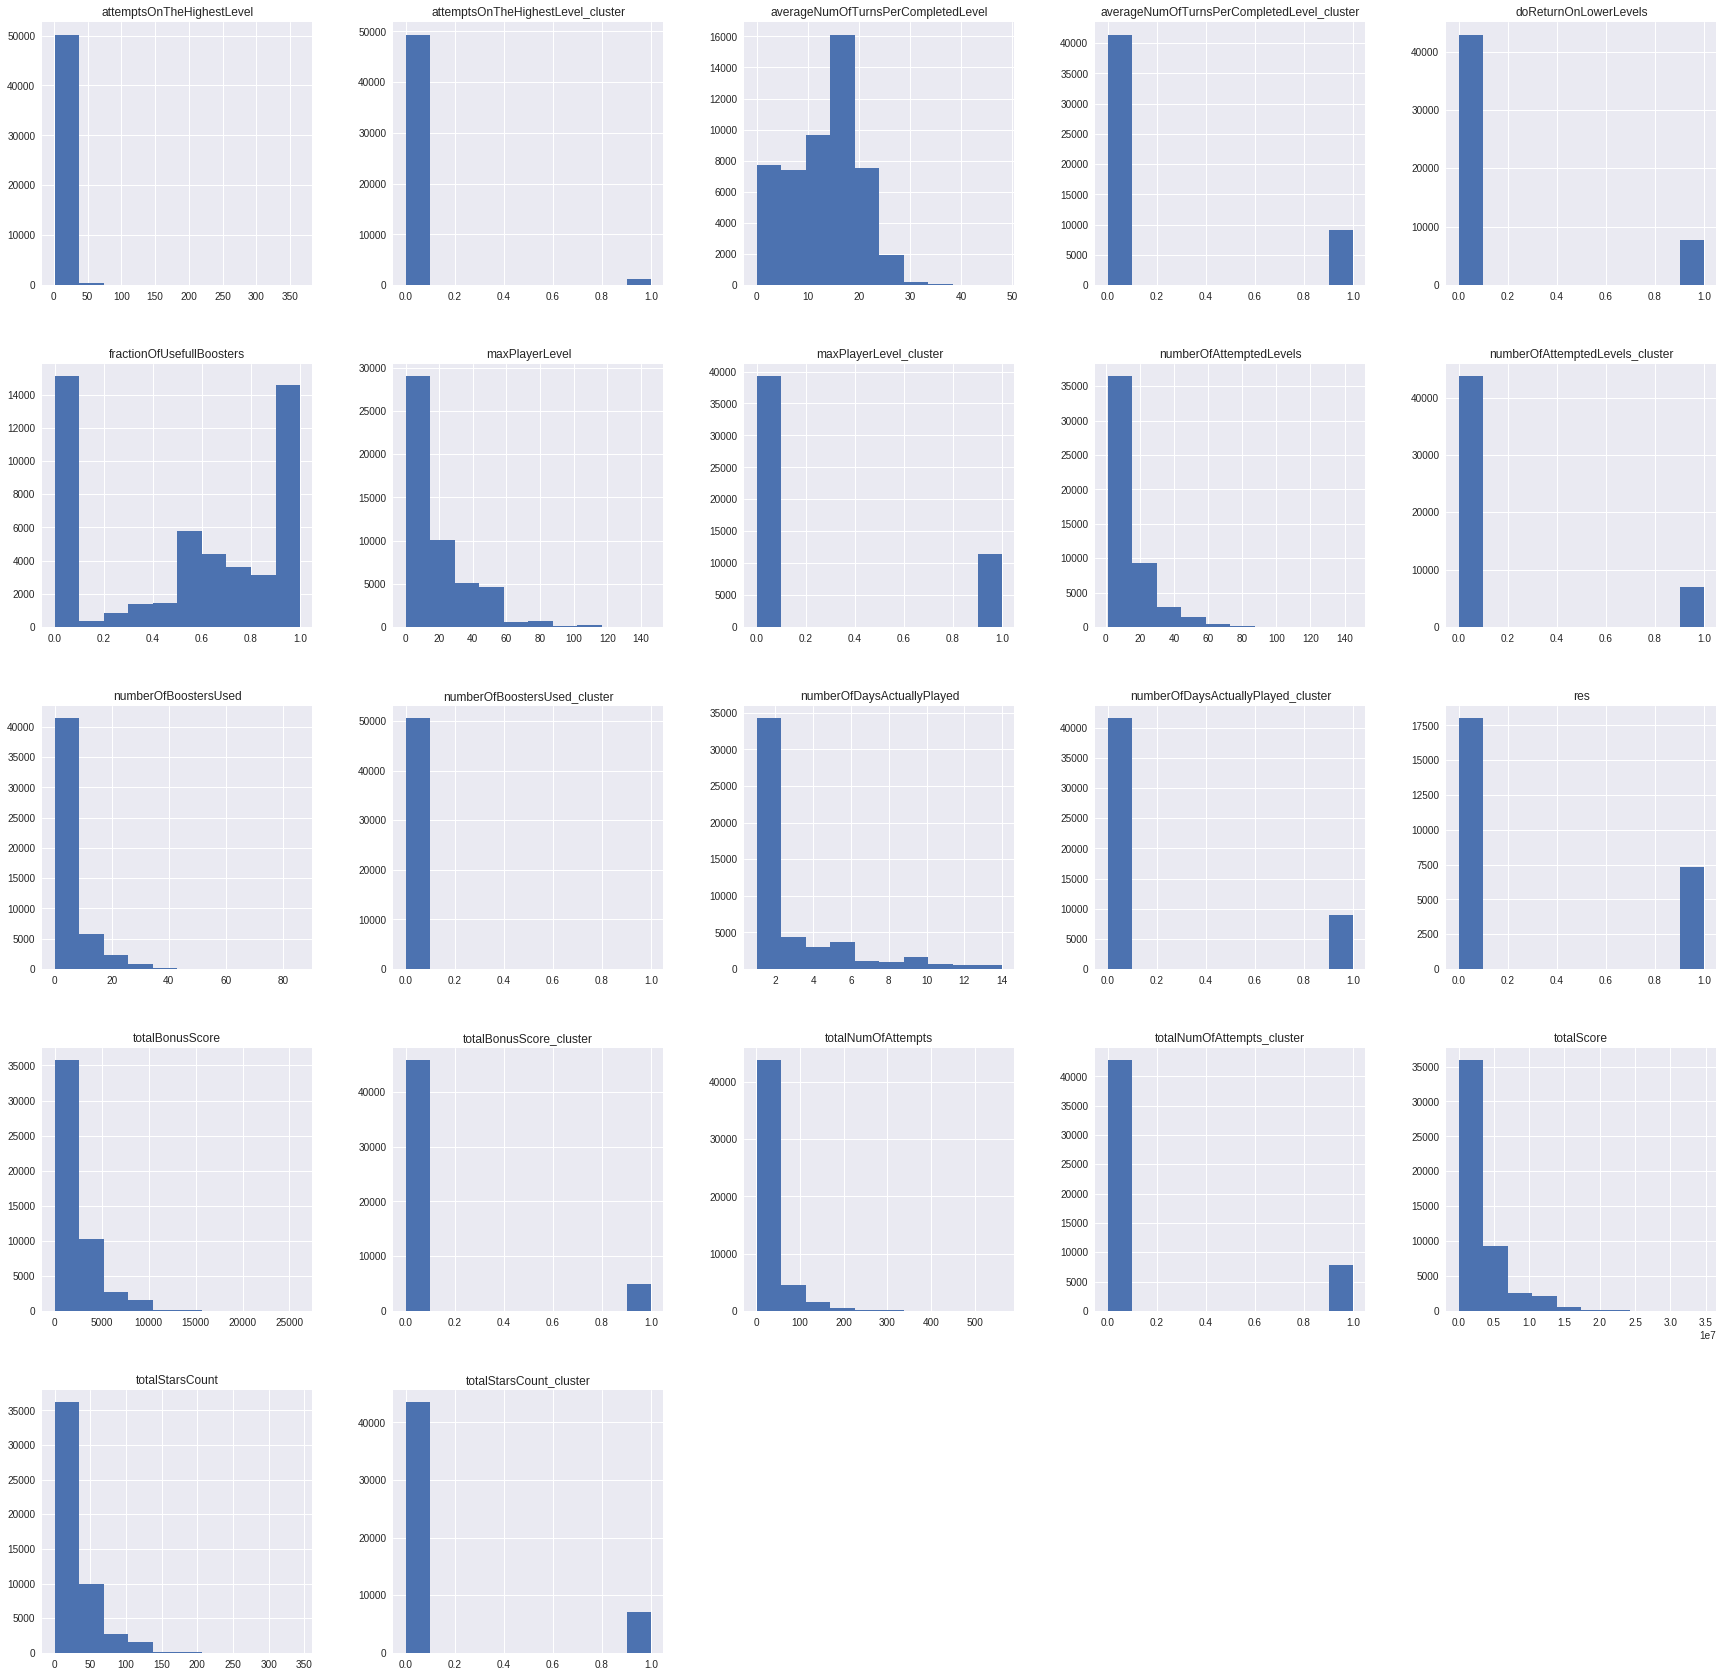

In [117]:
pd.concat([fich, res] , axis = 1).hist(figsize = (30,30))

In [5]:
import math
for i in range(2):
    x = [math.sqrt(abs(y)) for y in fich.averageNumOfTurnsPerCompletedLevel]
    fich.averageNumOfTurnsPerCompletedLevel = np.array(x)
    
    x = [math.sqrt(abs(y)) for y in fich.maxPlayerLevel]
    fich.maxPlayerLevel = np.array(x)

    
    x = [math.sqrt(abs(y)) for y in fich.numberOfAttemptedLevels]
    fich.numberOfAttemptedLevels = np.array(x)
    
    x = [math.sqrt(abs(y)) for y in fich.numberOfBoostersUsed]
    fich.numberOfBoostersUsed = np.array(x)
    
    x = [math.sqrt(abs(y)) for y in fich.numberOfDaysActuallyPlayed]
    fich.numberOfDaysActuallyPlayed = np.array(x)
    
    x = [math.sqrt(abs(y)) for y in fich.totalBonusScore]
    fich.totalBonusScore = np.array(x)
    
    x = [math.sqrt(abs(y)) for y in fich.totalNumOfAttempts]
    fich.totalNumOfAttempts = np.array(x)
    
    x = [math.sqrt(abs(y)) for y in fich.totalScore]
    fich.totalScore = np.array(x)
    
    x = [math.sqrt(abs(y)) for y in fich.totalStarsCount]
    fich.totalStarsCount = np.array(x)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = fich.columns
fich = pd.DataFrame(scaler.fit_transform(fich))
fich.columns = col

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25a88a9950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f25a7453550>]], dtype=object)

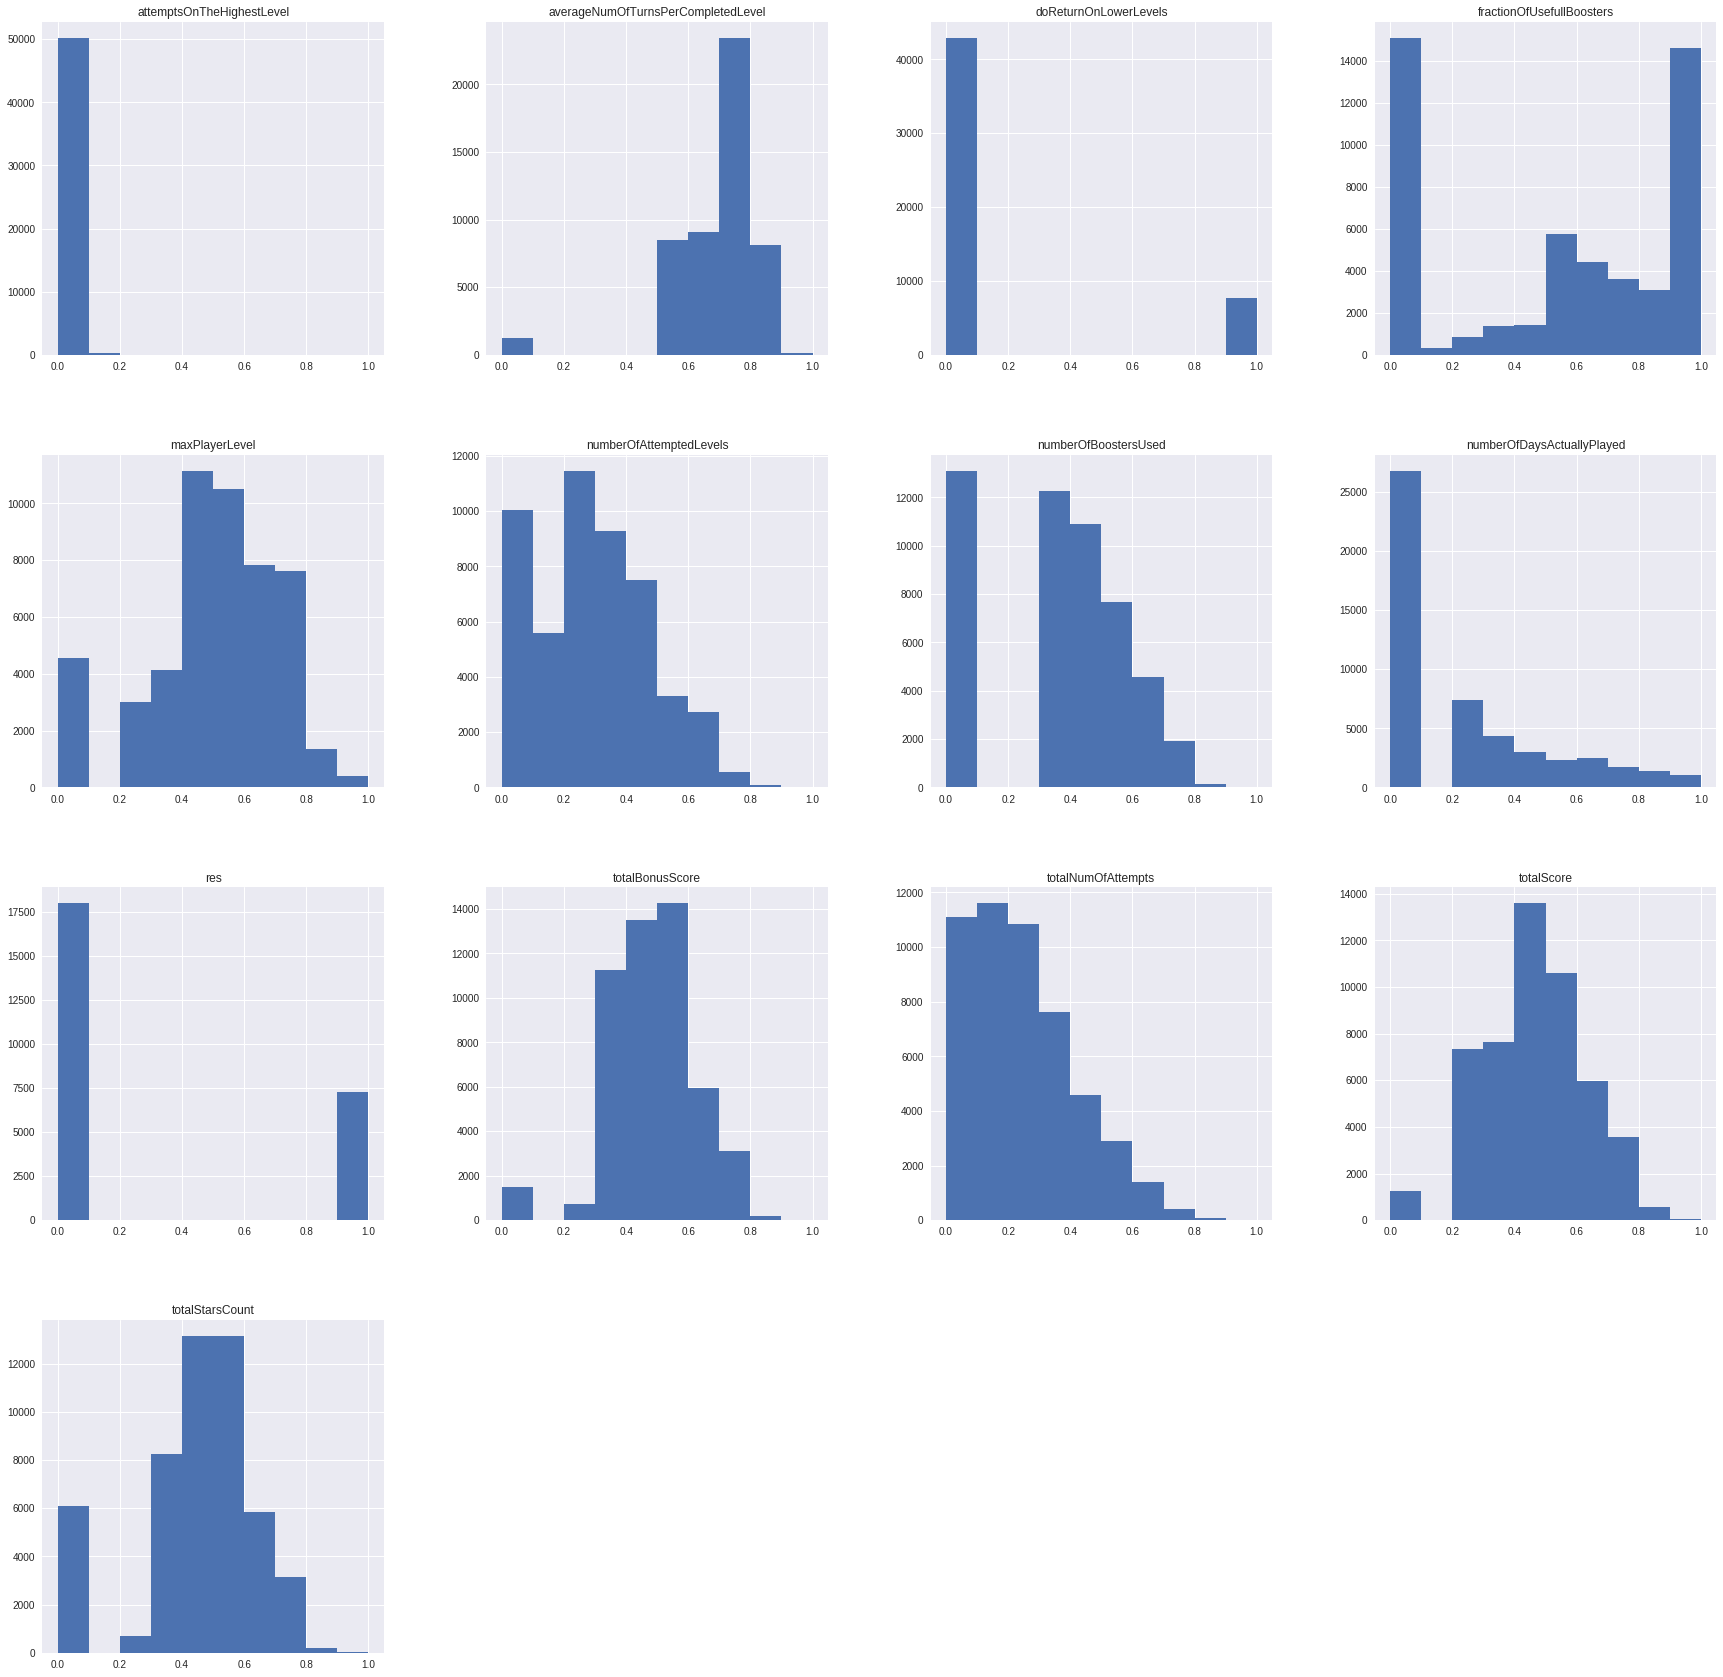

In [7]:
pd.concat([fich, res] , axis = 1).hist(figsize = (30,30))

In [8]:
x0 = 0,3604
def maxPlayerLevel(mpl):
    pass
    if mpl > x0:
        return 1
    else:
        return 0

fich['maxPlayerLevel_cluster'] = fich['maxPlayerLevel'].apply(maxPlayerLevel)

x1 = 0,69
def numberOfAttemptedLevels(noal):
    pass
    if noal > x1:
        return 1
    else:
        return 0

fich['numberOfAttemptedLevels_cluster'] = fich['numberOfAttemptedLevels'].apply(numberOfAttemptedLevels)


def attemptsOnTheHighestLevel(aothl):
    pass
    if aothl > fich.attemptsOnTheHighestLevel.mean():
        return 1
    else:
        return 0

fich['attemptsOnTheHighestLevel_cluster'] = fich['attemptsOnTheHighestLevel'].apply(attemptsOnTheHighestLevel)


x2 = 0,3222
def totalNumOfAttempts(tnof):
    pass
    if tnof > x2:
        return 1
    else:
        return 0

fich['totalNumOfAttempts_cluster'] = fich['totalNumOfAttempts'].apply(totalNumOfAttempts)


x3 = 0.7534
def averageNumOfTurnsPerCompletedLevel(anotpc):
    pass
    if anotpc > x3:
        return 1
    else:
        return 0

fich['averageNumOfTurnsPerCompletedLevel_cluster'] = fich['averageNumOfTurnsPerCompletedLevel'].apply(averageNumOfTurnsPerCompletedLevel)


x4 = 0.69
def numberOfBoostersUsed(nobu):
    pass
    if nobu > x4:
        return 1
    else:
        return 0

fich['numberOfBoostersUsed_cluster'] = fich['numberOfBoostersUsed'].apply(numberOfBoostersUsed)


x5 = 0.6308
def totalBonusScore(tbs):
    pass
    if tbs > x5:
        return 1
    else:
        return 0

fich['totalBonusScore_cluster'] = fich['totalBonusScore'].apply(totalBonusScore)


x6 = 0.7848
def totalStarsCount(tsc):
    pass
    if tsc > x6:
        return 1
    else:
        return 0

fich['totalStarsCount_cluster'] = fich['totalStarsCount'].apply(totalStarsCount)

x7 = 0.2704
def numberOfDaysActuallyPlayed(nodap):
    pass
    if nodap > x7:
        return 1
    else:
        return 0

fich['numberOfDaysActuallyPlayed_cluster'] = fich['numberOfDaysActuallyPlayed'].apply(numberOfDaysActuallyPlayed)


x8 = 0.4606
def totalScore(ts):
    pass
    if ts > x8:
        return 1
    else:
        return 0

fich['totalScore_cluster'] = fich['totalScore'].apply(totalScore)

In [9]:
fich.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,...,maxPlayerLevel_cluster,numberOfAttemptedLevels_cluster,attemptsOnTheHighestLevel_cluster,totalNumOfAttempts_cluster,averageNumOfTurnsPerCompletedLevel_cluster,numberOfBoostersUsed_cluster,totalBonusScore_cluster,totalStarsCount_cluster,numberOfDaysActuallyPlayed_cluster,totalScore_cluster
0,0.718916,0.315080,0.005495,0.266215,0.844763,1.0,0.491041,0.400000,0.525436,0.478974,...,0,0,0,0,1,0,0,0,0,1
1,0.615838,0.471939,0.049451,0.445163,0.771955,1.0,0.513941,0.333333,0.633908,0.618577,...,0,0,1,0,1,0,0,0,1,1
2,0.430184,0.228770,0.000000,0.145975,0.646784,0.0,0.328379,1.000000,0.396236,0.458047,...,0,0,0,0,0,0,0,0,0,0
3,0.615838,0.076599,0.010989,0.145975,0.793192,0.0,0.328379,0.000000,0.242384,0.000000,...,0,0,1,0,1,0,0,0,0,0
4,0.406843,0.200538,0.000000,0.127961,0.668740,0.0,0.328379,1.000000,0.396236,0.450389,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test = fich[25289:]
fich = fich[:25289]

In [11]:
fich

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,...,maxPlayerLevel_cluster,numberOfAttemptedLevels_cluster,attemptsOnTheHighestLevel_cluster,totalNumOfAttempts_cluster,averageNumOfTurnsPerCompletedLevel_cluster,numberOfBoostersUsed_cluster,totalBonusScore_cluster,totalStarsCount_cluster,numberOfDaysActuallyPlayed_cluster,totalScore_cluster
0,0.718916,0.315080,0.005495,0.266215,0.844763,1.0,0.491041,0.400000,0.525436,0.478974,...,0,0,0,0,1,0,0,0,0,1
1,0.615838,0.471939,0.049451,0.445163,0.771955,1.0,0.513941,0.333333,0.633908,0.618577,...,0,0,1,0,1,0,0,0,1,1
2,0.430184,0.228770,0.000000,0.145975,0.646784,0.0,0.328379,1.000000,0.396236,0.458047,...,0,0,0,0,0,0,0,0,0,0
3,0.615838,0.076599,0.010989,0.145975,0.793192,0.0,0.328379,0.000000,0.242384,0.000000,...,0,0,1,0,1,0,0,0,0,0
4,0.406843,0.200538,0.000000,0.127961,0.668740,0.0,0.328379,1.000000,0.396236,0.450389,...,0,0,0,0,0,0,0,0,0,0
5,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.000000,0.000000,0.238769,0.312767,...,0,0,0,0,0,0,0,0,0,0
6,0.546258,0.378259,0.002747,0.281005,0.753829,0.0,0.491041,0.800000,0.576151,0.575964,...,0,0,0,0,1,0,0,0,0,1
7,0.546258,0.378259,0.010989,0.324998,0.744782,0.0,0.464398,0.500000,0.561584,0.549100,...,0,0,1,0,0,0,0,0,0,1
8,0.342113,0.127960,0.000000,0.081650,0.632181,0.0,0.000000,0.000000,0.331528,0.411625,...,0,0,0,0,0,0,0,0,0,0
9,0.287681,0.076599,0.005495,0.127961,0.500000,1.0,0.000000,0.000000,0.238769,0.312767,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,...,maxPlayerLevel_cluster,numberOfAttemptedLevels_cluster,attemptsOnTheHighestLevel_cluster,totalNumOfAttempts_cluster,averageNumOfTurnsPerCompletedLevel_cluster,numberOfBoostersUsed_cluster,totalBonusScore_cluster,totalStarsCount_cluster,numberOfDaysActuallyPlayed_cluster,totalScore_cluster
25289,0.546258,0.253664,0.002747,0.189107,0.782542,0.0,0.390511,1.000000,0.460614,0.455537,...,0,0,0,0,1,0,0,0,0,1
25290,0.378610,0.167691,0.000000,0.107001,0.638943,0.0,0.000000,0.000000,0.362750,0.430821,...,0,0,0,0,0,0,0,0,0,0
25291,0.732359,0.276018,0.005495,0.313442,0.847084,0.0,0.491041,0.400000,0.501321,0.478974,...,0,0,0,0,1,0,0,0,1,1
25292,0.718916,0.200538,0.008242,0.232190,0.859948,0.0,0.000000,0.000000,0.444153,0.397159,...,0,0,1,0,1,0,0,0,1,0
25293,0.450246,0.253664,0.000000,0.161860,0.696341,0.0,0.390511,1.000000,0.444071,0.478974,...,0,0,0,0,0,0,0,0,0,0
25294,0.643275,0.253664,0.002747,0.232190,0.789690,0.0,0.552265,0.500000,0.462950,0.450389,...,0,0,0,0,1,0,0,0,0,1
25295,0.546258,0.378259,0.002747,0.319307,0.748631,1.0,0.552265,0.625000,0.520101,0.546187,...,0,0,0,0,0,0,0,0,1,1
25296,0.779848,0.697652,0.002747,0.541717,0.800306,0.0,0.666788,0.764706,0.796913,0.781103,...,0,0,0,0,1,0,1,0,1,1
25297,0.523914,0.348654,0.000000,0.222472,0.737263,0.0,0.464398,1.000000,0.491203,0.521007,...,0,0,0,0,0,0,0,0,0,1
25298,0.287681,0.076599,0.000000,0.145975,0.500000,1.0,0.000000,0.000000,0.350715,0.312767,...,0,0,0,0,0,0,0,0,0,0


In [13]:
fich.to_csv("fich_mail.csv", sep = ',', index=False)
test.to_csv("test_mail.csv", sep = ',', index=False)
res.to_csv("res_mail.csv", sep = ',', index=False , header=False)